In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from MIL_functions import data_analysis,molecule_analysis
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
from IPython import display as ICD
## done to hide an unneccesary error
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
hansen_raw = {
    'random':   pd.read_pickle('model_results/hansen/rscv_random_hansen_results.pk1')
}
hansen_macro_results={}; hansen_micro_results={}; hansen_results={}

for data in hansen_raw:
    hansen_results[data] = data_analysis.pickle_transform(hansen_raw[data])
    hansen_macro_results[data],hansen_micro_results[data] = data_analysis.macro_mirco_mean_stdv(hansen_results[data])
hansen_macro_results = data_analysis.get_AUROC(data_dict=hansen_raw, paste_dict=hansen_macro_results)
hansen_micro_results = data_analysis.get_AUROC(data_dict=hansen_raw, paste_dict=hansen_micro_results)

MACCS NSK linear is missing data
Morgan NSK linear is missing data
MACCS NSK polynomial is missing data
Morgan NSK polynomial is missing data


In [4]:
morgan_data,maccs_data = molecule_analysis.label_data(input_data=hansen_raw['random'],encodings=['Morgan','MACCS'],models=['NSK polynomial'],encoded_data_path="data/encoded/encoded_data_hansen.dat").values()

In [9]:
model = morgan_data
print('  +  :',sum(model['true label']))
print("  -  :",len(model['true label'])-sum(model['true label']))
print('total:',len(model['true label']))

  +  : 3452
  -  : 2940
total: 6392


In [10]:
model = maccs_data
print('  +  :',sum(model['true label']))
print("  -  :",len(model['true label'])-sum(model['true label']))
print('total:',len(model['true label']))

  +  : 3496
  -  : 3009
total: 6505


In [11]:
group_1 = molecule_analysis.molecule_group_analysis(data=morgan_data, function=molecule_analysis.polyaromatic_check)
if type(group_1) == pd.core.frame.DataFrame:
    group = data_analysis.ext_val_metrics(data_analysis.pickle_transform(group_1))
else:
    group = ''
ICD.display(group)

Number of group: 94.9
Ames +: 509         Ames -: 440         Total: 949         Ames + (%): 53.635


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,Morgan,NSK polynomial,0.780059,0.261465,0.560296,0.762908,0.776265,0.747126


c:\Users\user.000\anaconda3\envs\fuck\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:241: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


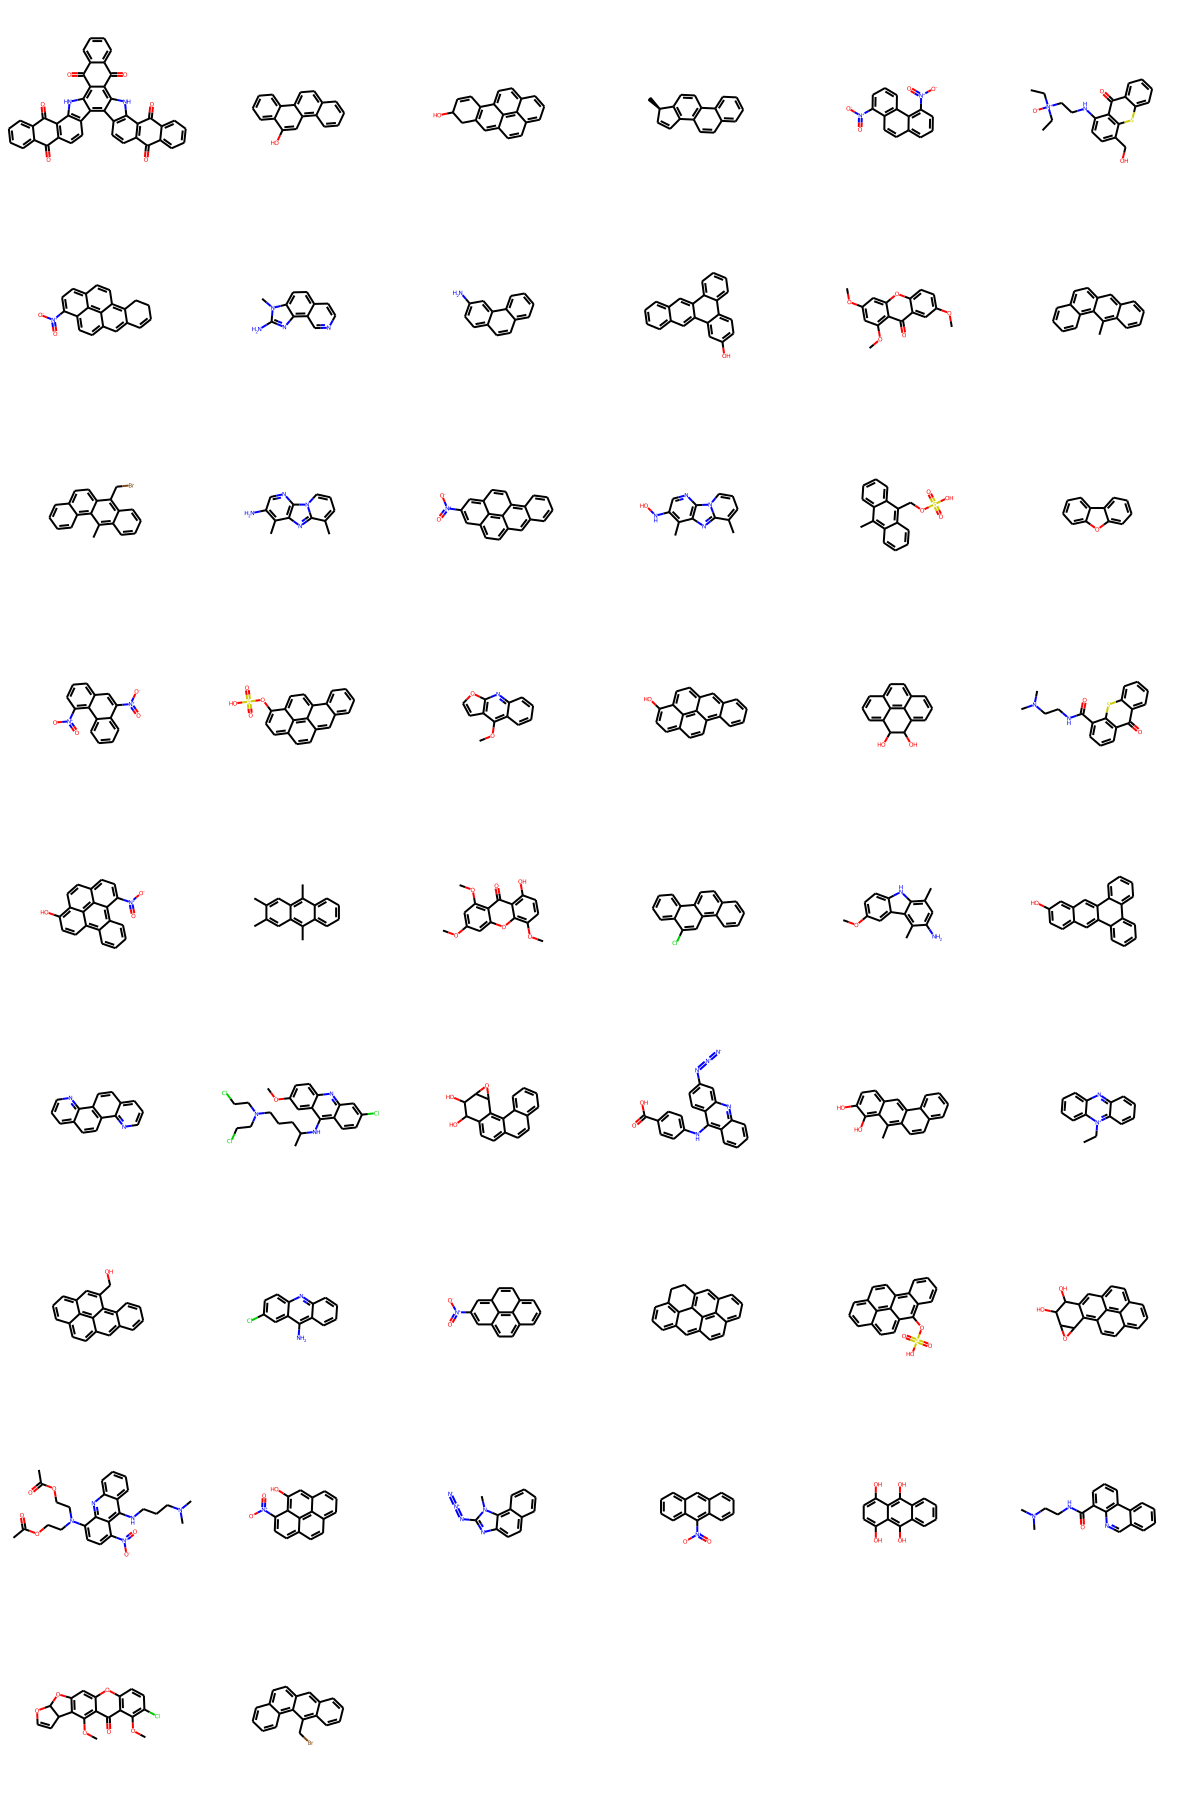

In [12]:
Draw.MolsToGridImage(group_1['smiles'].apply(lambda x: Chem.MolFromSmiles(x)).to_list(),molsPerRow=6)

In [13]:
molecule_groups = {
    'polyaromatic': molecule_analysis.polyaromatic_check,
    'PAB'   :   molecule_analysis.phenol_aniline_benzamide_check,
    'azido': molecule_analysis.azide_check,
    'halides': molecule_analysis.alkyl_alkenyl_halide_check,
    'quinolines': molecule_analysis.quinoline_check,
    'aromatic nitro': molecule_analysis.aromatic_nitro_check,
    'furan': molecule_analysis.furan_wo_nitro_check

}
for name in molecule_groups:
    print('*'*(len(name)+8));print("*** "+name+(" ***"));print('*'*(len(name)+8))
    group = molecule_analysis.molecule_group_analysis(data=morgan_data, function=molecule_groups[name])
    if type(group) == pd.core.frame.DataFrame:
        group = data_analysis.ext_val_metrics(data_analysis.pickle_transform(group))
    else:
        group = ''
    ICD.display(group)

********************
*** polyaromatic ***
********************
Number of group: 94.9
Ames +: 509         Ames -: 440         Total: 949         Ames + (%): 53.635


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,Morgan,NSK polynomial,0.780059,0.261465,0.560296,0.762908,0.776265,0.747126


***********
*** PAB ***
***********
Number of group: 43.9
Ames +: 251         Ames -: 188         Total: 439         Ames + (%): 57.175


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,Morgan,NSK polynomial,0.796715,0.272028,0.592486,0.774487,0.822034,0.719212


*************
*** azido ***
*************
Number of group: 6.1
Ames +: 37          Ames -: 24          Total: 61          Ames + (%): 60.656


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,Morgan,NSK polynomial,0.75,0.243966,0.508807,0.737705,0.888889,0.617647


***************
*** halides ***
***************
Number of group: 10.0
Ames +: 60          Ames -: 40          Total: 100          Ames + (%): 60.0


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,Morgan,NSK polynomial,0.892562,0.364017,0.785514,0.87,0.885246,0.846154


******************
*** quinolines ***
******************
Number of group: 13.8
Ames +: 73          Ames -: 65          Total: 138          Ames + (%): 52.899


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,Morgan,NSK polynomial,0.767123,0.252792,0.534247,0.753623,0.767123,0.738462


**********************
*** aromatic nitro ***
**********************
Number of group: 76.4
Ames +: 428         Ames -: 336         Total: 764         Ames + (%): 56.021


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,Morgan,NSK polynomial,0.800461,0.269417,0.601677,0.77356,0.790433,0.750769


*************
*** furan ***
*************
Number of group: 3.8
Ames +: 22          Ames -: 16          Total: 38          Ames + (%): 57.895


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,Morgan,NSK polynomial,0.851064,0.306122,0.708013,0.815789,0.8,0.846154
